# Example of simple use of active learning API
Compare 3 query strategies: random sampling, uncertainty sampling, and active search.
Observe how we trade off between finding targets and accuracy.

# Imports

In [1]:
import warnings
warnings.filterwarnings(action='ignore', category=RuntimeWarning)

from matplotlib import pyplot as plt
import numpy as np

from sklearn.base import clone
from sklearn.datasets import make_moons
from sklearn.svm import SVC

import active_learning
from active_learning.utils import *
from active_learning.query_strats import random_sampling, uncertainty_sampling, active_search

%matplotlib inline

# Load toy data

Have a little binary classification task that is not linearly separable.

In [2]:
X, y = make_moons(n_samples=200)

# Training Models

In [3]:
# Our basic classifier will be a SVM with rbf kernel
base_clf = SVC(probability=True)

# size of the initial labeled set
init_L_size = 5

# Make 30 queries
n_queries = 30

# set random state for consistency in training data
random_state = 0

### Random Sampling

In [4]:
random_experiment_data = perform_experiment(
    X, y, 
    base_estimator=clone(base_clf), 
    query_strat=random_sampling,
    n_queries=n_queries,
    init_L_size=init_L_size,
    random_state=random_state
)

100%|██████████| 30/30 [00:00<00:00, 759.88it/s]


### Uncertainty Sampling

In [5]:
uncertainty_experiment_data = perform_experiment(
    X, y,
    base_estimator=clone(base_clf),
    query_strat=uncertainty_sampling,
    n_queries=n_queries,
    init_L_size=init_L_size,
    random_state=random_state
)

100%|██████████| 30/30 [00:00<00:00, 525.48it/s]


### Active Search

In [6]:
as_experiment_data = perform_experiment(
    X, y,
    base_estimator=clone(base_clf),
    query_strat=active_search,
    n_queries=n_queries,
    init_L_size=init_L_size,
    random_state=random_state
)

100%|██████████| 30/30 [00:09<00:00,  3.03it/s]


# Compare

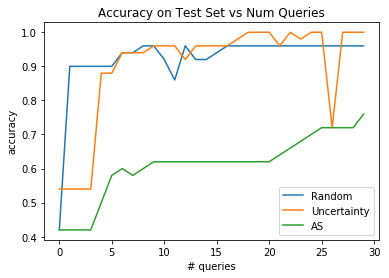

In [7]:
xx = np.arange(n_queries)

plt.plot(xx, random_experiment_data["accuracy"], label="Random")
plt.plot(xx, uncertainty_experiment_data["accuracy"], label="Uncertainty")
plt.plot(xx, as_experiment_data["accuracy"], label="AS")

plt.title("Accuracy on Test Set vs Num Queries")
plt.ylabel("accuracy")
plt.xlabel("# queries")
plt.legend()

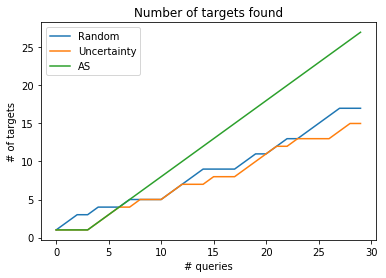

In [8]:
plt.plot(xx, random_experiment_data["history"], label="Random")
plt.plot(xx, uncertainty_experiment_data["history"], label="Uncertainty")
plt.plot(xx, as_experiment_data["history"], label="AS")

plt.title("Number of targets found")
plt.ylabel("# of targets")
plt.xlabel("# queries")
plt.legend()